In [1]:
import numpy as np
from scipy.constants import c, h, k, pi
from scipy import interpolate
from matplotlib import pyplot as plt

In [2]:
def Planck_Array(wavelength,temp):
    #wavelength should be a numpy array, temp is a singular scalar value
    return((8*pi*h*c**2)/((wavelength)**5 * (np.exp((h*c)/((wavelength)*k*temp))-1)))

In [3]:
temp = 5800 #defining temp and wavelengths for exercise
#wavelengths = np.linspace(1e-7,2e-6,5000)
wavelengths = np.linspace(1e-7,2e-6,5000)

In [4]:
intensities = Planck_Array(wavelengths,temp)

In [5]:
max_index = np.where(intensities==max(intensities)) #find index of the maximum intensity using numpy.where()

In [6]:
#expected maximum using Wein's Law:

lambda_max = (2.897755e-3)/(temp)

print("Wein's Law:   ",lambda_max,' m')
print("Computed:     ",wavelengths[max_index][0],' m')

Wein's Law:    4.996129310344828e-07  m
Computed:      4.994598919783956e-07  m


Text(0, 0.5, 'Intensity (W m^-3)')

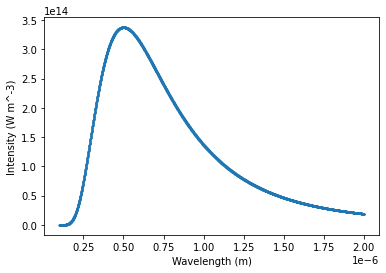

In [7]:
plt.scatter(wavelengths,intensities,s=1)
plt.xlabel("Wavelength (m)")
plt.ylabel("Intensity (W m^-3)")

In [8]:
#using scipy interpolation
x = wavelengths
y= intensities
f = interpolate.interp1d(x,y)

In [9]:
xnew = np.linspace(1e-7,2e-6,10000)
ynew = f(xnew)

Text(0, 0.5, 'Intensity (W m^-3)')

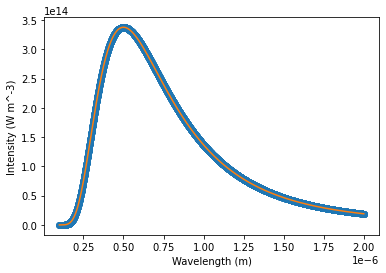

In [10]:
plt.plot(x,y,'o',xnew,ynew,'-')
plt.xlabel("Wavelength (m)")
plt.ylabel("Intensity (W m^-3)")

In [11]:
xnew[np.argmax(ynew)] #maximum from the interpolated data

4.996099609960996e-07

In [12]:
print("Wein's Law:   ",lambda_max,' m')
print("Computed:     ",wavelengths[max_index][0],' m')
print("Interpolated: ",xnew[np.argmax(ynew)],' m')

Wein's Law:    4.996129310344828e-07  m
Computed:      4.994598919783956e-07  m
Interpolated:  4.996099609960996e-07  m


# 2D Visualization, for class on 1/30:

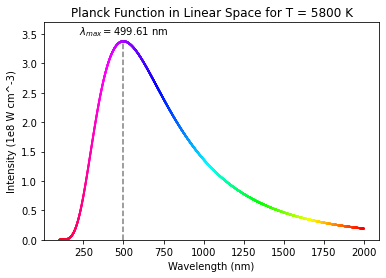

In [13]:
#Visualization exercise starting 1/30
plt.scatter((wavelengths*1e9),(intensities*1e-6*1e-8),s=1,c=wavelengths,cmap='hsv_r')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (1e8 W cm^-3)")
plt.text(lambda_max*1e9,3.5e8*1e-8,str("$\lambda_{max} = $" + str(round(lambda_max*(10**9),2))  + " nm"),horizontalalignment='center')
plt.vlines(lambda_max*1e9,0,intensities[max_index]*1e-6*1e-8,linestyles='dashed',color="grey")
plt.ylim([0,3.7e8*1e-8])
#plt.yticks([0,5e13,10e13,3e14,4e14])
#plt.xticks([0,0.5e-6,1e-6,2e-6])
plt.title(str("Planck Function in Linear Space" + " for T = " + str(temp) + " K"));
plt.savefig("Glaze_PlanckPlot.png")
#plt.ylim([10e8,10e15])
#plt.xscale("log")
#plt.yscale('log')

In [15]:
#plotting two additional temperatures:
intensities_4500K = Planck_Array(wavelengths,4500)
intensities_7000K = Planck_Array(wavelengths,7000)

lambda_max_4500K = (2.897755e-3)/(4500)
lambda_max_7000K = (2.897755e-3)/(7000)

max_index_4500K = np.where(intensities_4500K==max(intensities_4500K))
max_index_7000K = np.where(intensities_7000K==max(intensities_7000K))

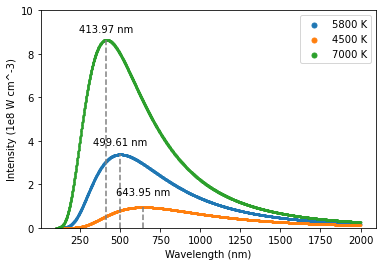

In [39]:
plt.scatter((wavelengths*1e9),(intensities*1e-6*1e-8),s=1)
plt.scatter((wavelengths*1e9),(intensities_4500K*1e-6*1e-8),s=1)
plt.scatter((wavelengths*1e9),(intensities_7000K*1e-6*1e-8),s=1)

#plt.text(lambda_max*1e9,3.5e8*1e-8,str("$\lambda_{max} = $" + str(round(lambda_max*(10**9),2))  + " nm"),horizontalalignment='center')
plt.text(lambda_max*1e9,3.8e8*1e-8,str(str(round(lambda_max*(10**9),2))  + " nm"),horizontalalignment='center')
plt.vlines(lambda_max*1e9,0,intensities[max_index]*1e-6*1e-8,linestyles='dashed',color="grey")

plt.text(lambda_max_7000K*1e9,9e8*1e-8,str(str(round(lambda_max_7000K*(10**9),2))  + " nm"),horizontalalignment='center')
plt.vlines(lambda_max_7000K*1e9,0,intensities_7000K[max_index_7000K]*1e-6*1e-8,linestyles='dashed',color="grey")

plt.text(lambda_max_4500K*1e9,1.5e8*1e-8,str(str(round(lambda_max_4500K*(10**9),2))  + " nm"),horizontalalignment='center')
plt.vlines(lambda_max_4500K*1e9,0,intensities_4500K[max_index_4500K]*1e-6*1e-8,linestyles='dashed',color="grey")


plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (1e8 W cm^-3)")
plt.ylim([0,1e9*1e-8])
plt.legend( ['5800 K', '4500 K', '7000 K'],markerscale=5)

# 3D Visualization, in class activity for 2/6:

In [43]:
#wavelength array should be the same, we need to define an intensities array for each temperature.
#    then we need to construct a 2D array by appending each intensities list for each temperature.

#intensities = Planck_Array(wavelengths,temp)

temps = np.linspace(4500,7000,100)
wavelengths = np.linspace(1e-7,2e-6,100)

intensities_grid = Planck_Array(wavelengths,temps)

TypeError: missing a required argument: 'Y'

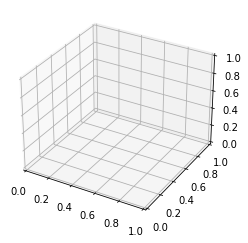

In [45]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(intensities_grid)